In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels as sm

In [2]:
accidentes = pandas.read_csv('Reporte_Lesiones_Personales_y_en_Accidente_de_Transito_Policia_Nacional.csv')
print(accidentes.shape)
accidentes.head(3)

(1318191, 9)


/var/folders/5n/bzy5ks2d7m17gxrddmh22r900000gn/T/ipykernel_95094/3933465671.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  accidentes = pandas.read_csv('Reporte_Lesiones_Personales_y_en_Accidente_de_Transito_Policia_Nacional.csv')


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1


In [6]:
accidentes_trafico_values = [
    "VEHICULO"#, "MOTO"
]

In [152]:
accidentes_trafico = accidentes[
    accidentes['ARMAS MEDIOS'].isin(accidentes_trafico_values)]\
    .copy().reset_index(drop=True)

accidentes['FECHA HECHO'] = \
    pd.to_datetime(accidentes['FECHA HECHO'], format='%d/%m/%Y')

accidentes_trafico['fecha_mes'] = \
    pd.to_datetime(accidentes_trafico['FECHA HECHO'], format='%d/%m/%Y').dt.to_period('M')
print(accidentes_trafico.shape)
accidentes_trafico.head(3)

(186044, 10)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD,fecha_mes
0,ANTIOQUIA,MEDELLÍN (CT),5001000,VEHICULO,2010-01-01,FEMENINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,2010-01
1,ANTIOQUIA,MEDELLÍN (CT),5001000,VEHICULO,2010-01-01,MASCULINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,2010-01
2,ANTIOQUIA,MEDELLÍN (CT),5001000,VEHICULO,2010-01-01,MASCULINO,MENORES,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,2010-01


In [213]:
# accidentes_trafico_agg = accidentes_trafico.copy()

accidentes_trafico_agg = accidentes_trafico[
    accidentes_trafico['DEPARTAMENTO'].isin(['CUNDINAMARCA'])]\
    .copy().reset_index(drop=True)

# accidentes_trafico_agg = accidentes_trafico[
#     accidentes_trafico['MUNICIPIO'].isin(['BOGOTÁ D.C. (CT)'])]\
#     .copy().reset_index(drop=True)

accidentes_trafico_agg = accidentes_trafico_agg[
    accidentes_trafico_agg['fecha_mes'] <= '2018-01']\
    .copy().reset_index(drop=True)

accidentes_trafico_agg = accidentes_trafico_agg\
    .groupby(['DEPARTAMENTO', 'fecha_mes'], as_index=False)\
    .agg(conteo_accidentes=('CANTIDAD', 'sum'))

accidentes_trafico_agg.columns = [
    _col.replace(' ', '_').lower() for _col in accidentes_trafico_agg.columns]

accidentes_trafico_agg = accidentes_trafico_agg\
    .sort_values(by=['fecha_mes'])\
    .reset_index(drop=True)

print(accidentes_trafico_agg.shape)
accidentes_trafico_agg.head(3)

# accidentes_trafico_agg['MUNICIPIO'].value_counts(dropna=False)

(97, 3)


,departamento,fecha_mes,conteo_accidentes
0,CUNDINAMARCA,2010-01,359
1,CUNDINAMARCA,2010-02,362
2,CUNDINAMARCA,2010-03,380


<Axes: xlabel='fecha_mes'>

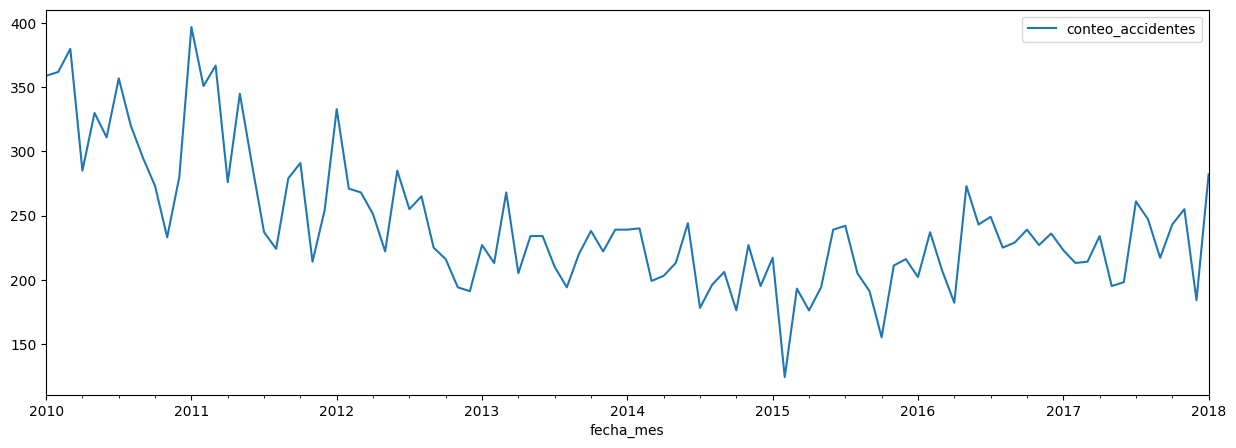

In [214]:
accidentes_trafico_agg.plot(x='fecha_mes', y='conteo_accidentes', figsize=(15, 5))

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Importamos la serie de tiempo
serie = accidentes_trafico_agg.copy()\
    .drop(columns=['departamento'])\
    .astype({'fecha_mes': 'datetime64[s]'})\
    .set_index('fecha_mes')\
    ['conteo_accidentes']

serie.to_csv('serie_limpia.csv')

serie

fecha_mes
2010-01-01    359
2010-02-01    362
2010-03-01    380
2010-04-01    285
2010-05-01    330
             ... 
2017-09-01    217
2017-10-01    243
2017-11-01    255
2017-12-01    184
2018-01-01    282
Name: conteo_accidentes, Length: 97, dtype: int64

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
      

<Axes: xlabel='fecha_mes'>

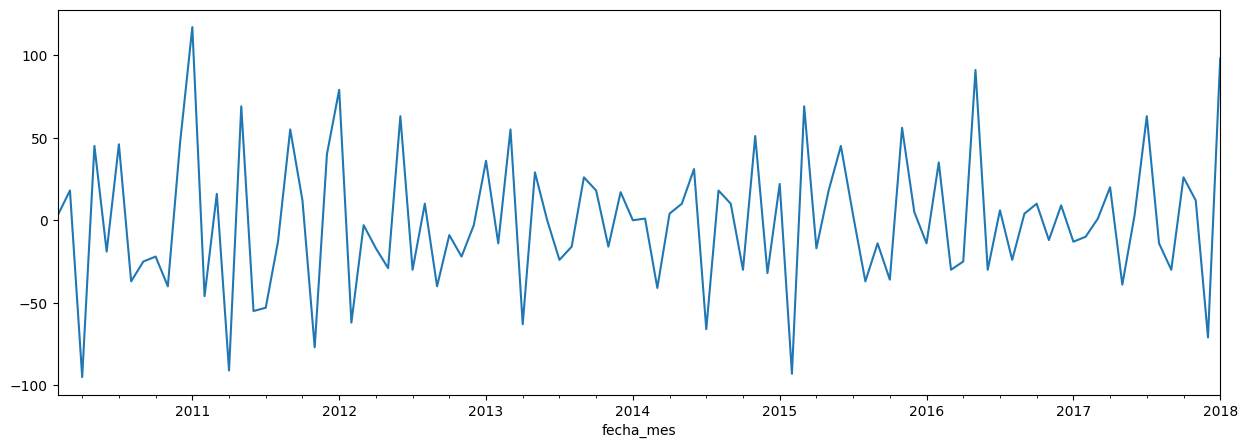

In [216]:
serie.plot(figsize=(15, 5))

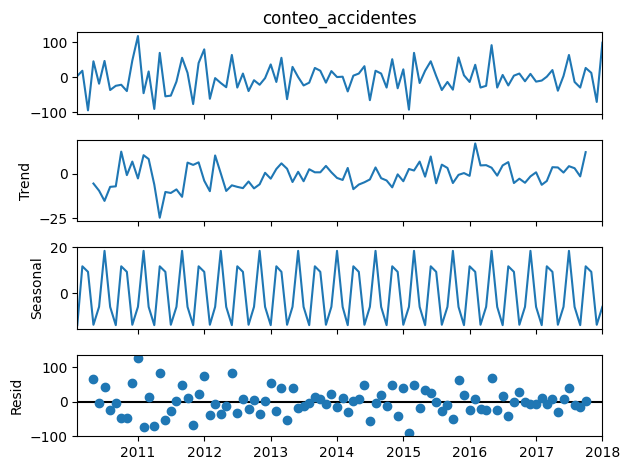

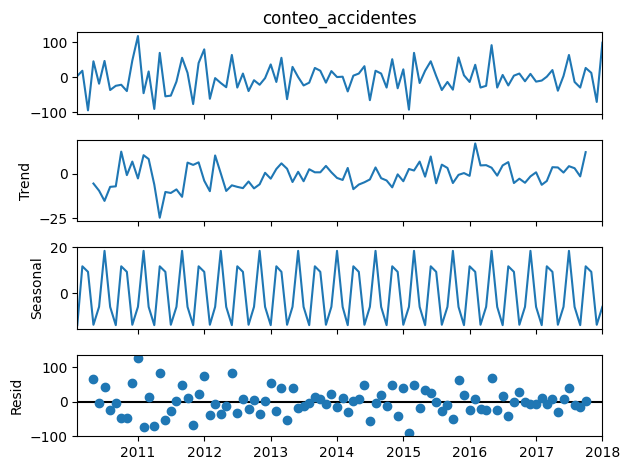

In [217]:

# Descomponemos la serie
descomposicion = seasonal_decompose(serie, model='additive', period=7)

# Visualizamos los componentes
descomposicion.plot()

In [165]:
# serie.shift(1)[1:]
serie[:-1]

,conteo_accidentes
fecha_mes,
2010-01-01,197
2010-02-01,219
2010-03-01,232
2010-04-01,120
2010-05-01,138
...,...
2022-07-01,91
2022-08-01,49
2022-09-01,43


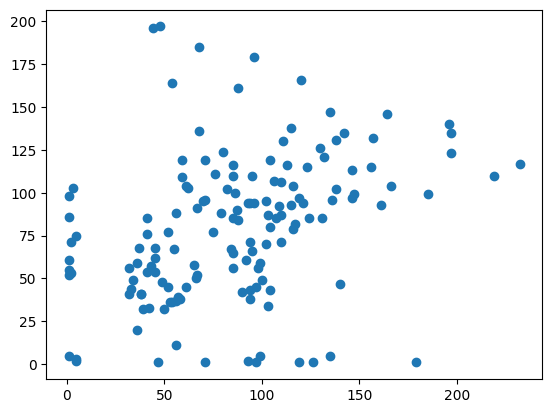

In [182]:
_n = 10
plt.scatter(serie[:-_n], serie.shift(1)[_n:])

In [8]:
accidentes_trafico['DESCRIPCIÓN CONDUCTA'].value_counts()

DESCRIPCIÓN CONDUCTA
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )    184056
LESIONES PERSONALES                                 1988
Name: count, dtype: int64